In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [8]:
fulldata = pd.read_csv('home_credit_data.csv') 
cleandata = pd.read_csv('cleandata.csv')

In [9]:
fulldata.head(5)

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,...,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT,AMT_CREDIT_SUM_DEBT,MEAN_DAYS_APPLY,MAX_DAYS_APPLY,NUM_ACTIVE_LOANS,TARGET,SK_ID_CURR
0,0,0,1,0,202500.0,24700.5,351000.0,0.018801,-637.0,-3648.0,...,2.007889,0.121978,0.060749,-0.067329,245781.0,-874.00,-103.0,2.0,1,100002
1,0,0,0,0,270000.0,35698.5,1129500.0,0.003541,-1188.0,-1186.0,...,4.790750,0.132217,0.027598,-0.070862,0.0,-1400.75,-606.0,1.0,0,100003
2,1,1,1,0,67500.0,6750.0,135000.0,0.010032,-225.0,-4260.0,...,2.000000,0.100000,0.050000,-0.011814,0.0,-867.00,-408.0,0.0,0,100004
3,0,0,1,0,135000.0,29686.5,297000.0,0.008019,-3039.0,-9833.0,...,2.316167,0.219900,0.094941,-0.159905,0.0,0.00,0.0,0.0,0,100006
4,0,0,1,0,121500.0,21865.5,513000.0,0.028663,-3038.0,-4311.0,...,4.222222,0.179963,0.042623,-0.152418,0.0,-1149.00,-1149.0,0.0,0,100007


In [42]:
def classify(data):
    y= data['TARGET']
    X= data.drop(columns=['TARGET','SK_ID_CURR'])
    print("scaling")
    scalar= MinMaxScaler()
    scalar.fit_transform(data)
    print("test train splitting")
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)
    
    clf= RF(max_depth=10 ,n_estimators=20)
    print("fitting clf")
    clf.fit(X_train, y_train)
    print("predicting")
    #preds= clf.predict(X_test)
    y_scores= clf.predict_proba(X_test)
    print("roc")
    r= roc_auc_score(y_test, y_scores[:,1])
    print(r)
    acc= clf.score(X_test, y_test)
    print("Accuracy: ", acc)
    plot_roc_curve(clf, X_test, y_test)
    plt.show()
    

scaling
test train splitting
fitting clf
predicting
roc
0.7389606290118453
Accuracy:  0.9189470432336634


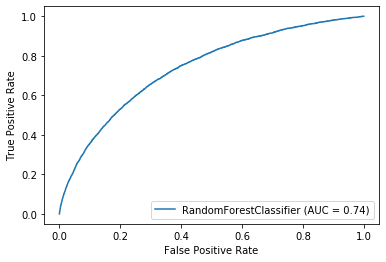

In [43]:
classify(fulldata)

scaling
test train splitting
fitting clf
predicting
roc
0.7184407963107204
Accuracy:  0.918638115213892


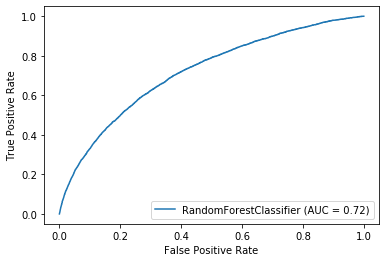

In [44]:
classify(cleandata)